In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
def prepare_country_stats(oecd_bli,gdp_per_capita):
    oecd_bli=oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli=oecd_bli.pivot(index="Country",columns="Indicator",
                            values="Value")
    gdp_per_capita.rename(columns={"2015":"GDP per capita"},inplace=True)
    gdp_per_capita.set_index("Country",inplace=True)
    full_country_stats=pd.merge(left=oecd_bli,right=gdp_per_capita,
                                left_index=True,right_index=True)
    full_country_stats.sort_values(by="GDP per capita",inplace=True)
    
    remove_indices=[0,1,6,8,33,34,35]
    keep_indices=list(set(range(36))-set(remove_indices))
    print(full_country_stats[["GDP per capita","life satisfaction"]].iloc[keep_indices])
    return full_country_stats[["GDP per capita",'Life satisfaction']].iloc[keep_indices]
#load the data
oecd_bli=pd.read_csv("oecd_bli_2015.csv",
                     thousands=",")
gdp_per_capita=pd.read_csv("gdp_per_capita.csv",
                           thousands=',',delimiter='\t',encoding='latin1',
                           na_values="n/a")
country_stats=prepare_country_stats(oecd_bli,gdp_per_capita)
x=np.c_[country_stats["GDP per capita"]]
y=np.c_[country_stats["Life satisfaction"]]

country_stats.plot(kind='scatter',x="GDP per capita",y='Life satisfaction')
plt.show()

lin_reg_model=sklearn.linear_model.LinearRegression()

lin_reg_model.fit(x,y)
x_new=[[22587]]
print(lin_reg_model.predict(x_new))


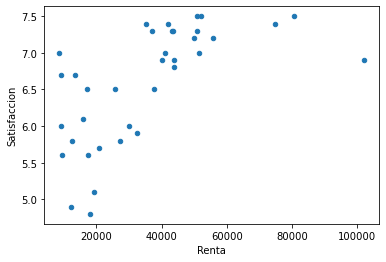

[[5.76666667]]


In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model
import sklearn.neighbors
import matplotlib.pyplot as plt

# Load the data
bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')

gdp = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter=',',
                             encoding='latin1', na_values="n/a")


# Prepare the data

bli = bli[bli["INEQUALITY"]=="TOT"]
bli = bli[bli["INDICATOR"]=="SW_LIFS"]

nbli = pd.DataFrame(columns=['Pais','Satisfaccion'])
nbli['Pais']=bli['Country']
nbli['Satisfaccion']=bli['Value']
nbli.set_index("Pais", inplace=True)

ngdp = pd.DataFrame(columns=['Pais','Renta'])
ngdp['Pais']=gdp['Country']
ngdp['Renta']=gdp['2015']
ngdp.set_index("Pais", inplace=True)
ngdp = ngdp.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors='coerce'))

country_stats = pd.merge(left=nbli, right=ngdp,
                                  left_index=True, right_index=True)

country_stats.sort_values(by="Renta", inplace=True)

# Visualize the data
country_stats.plot(kind='scatter', x="Renta", y='Satisfaccion')
plt.show()

X = np.c_[country_stats["Renta"]]
y = np.c_[country_stats["Satisfaccion"]]

# Select a linear model (Opcional)
model = sklearn.linear_model.LinearRegression()
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) 


(70000, 784)


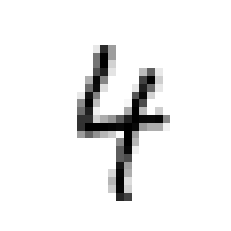

['5' '0' '4' ... '5' '6' '8']
[5 0 4 ... 5 6 8]
[False False  True ... False False False]


array([ True])

In [11]:
# exp2 digit image classifier
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1,cache=True)
x,y=mnist["data"],mnist["target"]
print(x.shape)
#% matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit=x[26000]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image ,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]
print(y_train)

import numpy as np

y_train=y_train.astype(np.int8)
print(y_train)
y_train_4=(y_train==4)
print(y_train_4)


from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_4)
sgd_clf.predict([some_digit])


Coefficients: 
 [938.23786125]
Intercept:  152.91886182616167
Mean squared error: 2548.07
Variance score: 0.47


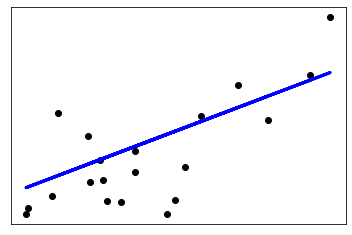

In [2]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets, linear_model 
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset

diabetes = datasets.load_diabetes()

#print(diabetes.DESCR)

# Use only one feature

diabetes_X = diabetes.data[:, np.newaxis,2]

# Split the data into training/testing sets

diabetes_X_train = diabetes_X[:-20]

diabetes_X_test= diabetes_X[-20:]
diabetes_y_train =diabetes.target[:-20]
diabetes_y_test =diabetes.target[-20:]

regr = linear_model.LinearRegression()

# Train the model using the training sets 
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set 
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients

print('Coefficients: \n', regr.coef_) 
print('Intercept: ',regr.intercept_)
print("Mean squared error: %.2f" %mean_squared_error(diabetes_y_test,diabetes_y_pred))
print("Variance score: %.2f" %r2_score(diabetes_y_test,diabetes_y_pred))
plt.scatter(diabetes_X_test,diabetes_y_test,color='black')
plt.plot(diabetes_X_test,diabetes_y_pred,color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [3]:
  #3support vector machine 
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
x = iris["data"][:,(2,3)]
y=(iris["target"] == 2).astype(np.float64)
svm_clf=Pipeline((("scaler",StandardScaler()),("linear_svc",LinearSVC(C=1,loss="hinge")),))
svm_clf.fit(x,y)
print(svm_clf.predict([[5.5,1.7]]))
print(y)

[1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [1]:
         #EXP:PRINCIPAL COMPONENT ANALYSIS
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1,cache=True)
x,y=mnist["data"],mnist["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y)
from sklearn.decomposition import PCA
import numpy as np
pca=PCA()
pca.fit(x_train)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
print(d)
print(np.sum(pca.explained_variance_ratio_))
pca=PCA(n_components=154)
x_reduced=pca.fit_transform(x_train)
x_recovered=pca.inverse_transform(x_reduced)
print(x_reduced)
print(x_recovered)

154
0.9999999999999998
[[1045.68837199   43.66029036 -292.53320098 ...   -4.05211602
   -63.10030399  -21.88882606]
 [-141.34713106  541.7832999   587.15871122 ...   25.65755748
    42.1947586   -12.98117362]
 [  74.60551934  686.54160797   68.7035786  ...  -33.95256539
     7.83136761  -41.75940041]
 ...
 [ -23.62189562  506.43078857 -254.00043629 ...  -27.54451323
    70.57217563    8.21628114]
 [  -3.11990512  778.32823695 -678.40637662 ...  -75.322749
   -62.06948205   18.01536254]
 [ 104.2237617   816.31286484  373.41171542 ...   17.53504133
    20.06467428  108.52815002]]
[[-4.86350317e-15  2.90519601e-13  1.01769475e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.56073037e-13  3.51122789e-14  6.79375580e-14 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.60053105e-14  1.63322754e-13 -1.35323863e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-8.73234432e-14 -3.49873374e-14 -1.70409990e-13 ...  0.00000000e+00
   0.00000000e+00  0.0000

In [1]:
#EXP5 :DECISION TREE
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris=load_iris()
x=iris.data[:,2:]
y=iris.target
tree_clf= DecisionTreeClassifier(max_depth=2 )
tree_clf.fit(x,y)
from sklearn.tree import export_graphviz
export_graphviz(
tree_clf,out_file="iris_tree.dot",feature_names=iris.feature_names[2:],
class_names=iris.target_names,rounded=True,
filled=True)
print(tree_clf.predict_proba([[5,1.5]]))
print(tree_clf.predict([[5,1.5]]))


[[0.         0.90740741 0.09259259]]
[1]


In [1]:
# exp6. Ensemble Learning
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=500,noise=0.30,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf=LogisticRegression(solver="liblinear",random_state=42)
rnd_clf=RandomForestClassifier(n_estimators=10,random_state=42)
svm_clf=SVC(gamma="auto",random_state=42)
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')
from sklearn.metrics import accuracy_score
for clf in(log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))


LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


In [19]:
#  EXP9:RANDOM FORESTS
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import numpy as np
x,y=make_moons(n_samples=500,noise=0.30,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf=BaggingClassifier(
DecisionTreeClassifier(splitter="random",max_leaf_nodes=16,random_state=42),
n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,random_state=42)

bag_clf.fit(x_train,y_train)
y_pred=bag_clf.predict(x_test)
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1,random_state=42)
rnd_clf.fit(x_train,y_train)
y_pred_rf=rnd_clf.predict(x_test)
np.sum(y_pred==y_pred_rf)/len(y_pred)

0.976

In [1]:
# EXP10:PRINCIPAL COMPONENT ANALYSIS

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1,cache=True)
x,y=mnist["data"],mnist["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y)

from sklearn.decomposition import PCA
import numpy as np
pca=PCA()
pca.fit(x_train)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
print(d)
print(np.sum(pca.explained_variance_ratio_))
pca=PCA(n_components=154)
x_reduced=pca.fit_transform(x_train)
x_recovered=pca.inverse_transform(x_reduced)
print(x_reduced)
print(x_recovered)


154
1.0
[[ 527.47205963  -76.84254011  243.1039954  ...  -92.30491706
    -1.43208617  -34.00395211]
 [-471.36899979  345.94965464  -14.71349995 ...   -2.44780437
    11.78094089   -3.04678661]
 [  -7.70619314 -256.84989948  -89.33165376 ...  -28.97559606
   -20.37226834  -74.22659252]
 ...
 [ -78.55930169  764.40188604 -141.47647359 ...  -29.48247655
    32.30941263  -66.94776186]
 [  52.87108436 -583.77447706  748.3892528  ...  -28.36114041
    17.57412535   50.58762839]
 [-405.02446034  234.21671745 -180.06853805 ...  -15.94582965
    32.63893183   92.23507507]]
[[-7.01459509e-14 -6.16770818e-13 -6.43283075e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.96099993e-14  2.21346444e-13  4.32791479e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.65317398e-14 -1.10801137e-14  4.58840211e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-2.29246578e-14  5.42068127e-13 -1.07663180e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 

[[43.2 16.7]
 [29.6 66.8]
 [55.1 46.1]]


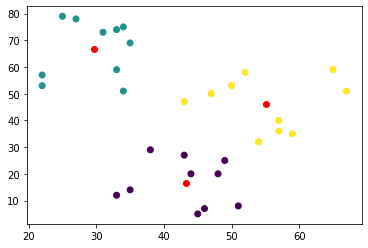

In [2]:
#EXP5:K-MEANS CLUSTER 
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Data={'x':[25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
      'y':[79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]}
df=DataFrame(Data,columns=['x','y'])
kmeans=KMeans(n_clusters=3).fit(df)
centroids=kmeans.cluster_centers_
print(centroids)
plt.scatter(df['x'],df['y'],c=kmeans.labels_.astype(float))
plt.scatter(centroids[:,0],centroids[:,1],c='red')